#### COMP 333 Assignment 4, Nazli Ensafi, 40038607


***Data Analytics Considering Child Passengers on the Titanic Dataset***

Analyse the Titanic dataset to determine which factors affect the survival rate of children in the form of Situation, Problem, Solution, Next Steps, Considering  age, sex, embarkation port, and size of the family that was travelling.

sinbsp : Number of Siblings/Spouses Aboard + parch : Number of Parents/Children Aboard 
Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) 

The Tatanic dataset contains 3 csv files; train.csv has 891 records, test.csv contains 418 records, from pasenger ID 892 to 1309. gender_submission.csv containg 2 columns "Passengerid", and "Survived" for the records in the test.csv fime. To have all the records and features in one data frame. Let's combine gender_submission and test column-wise and first and the store the result, then combine it with train row-wise and store it in a new data frame. 

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df_gender_submission = pd.read_csv("gender_submission.csv")
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [57]:
df_ct = pd.merge(df_gender_submission, df_test, how='inner', on = 'PassengerId'
                )

In [58]:
df_ct

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [59]:
df = pd.concat([df_train, df_ct])

In [60]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Let's count number of children, assuming people who are under the age of 18 are considered children.

In [63]:
num_children = len(df[df['Age'] < 18])

In [64]:
print(num_children)

154


Now Let's create a new feature for the size of the family by adding up sinbsp : Number of Siblings/Spouses Aboard + parch : Number of Parents/Children Aboard 

In [65]:
df['familys'] = df['SibSp'] + df['Parch']

In [66]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familys
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [67]:
df.to_csv('titanic.csv', index=False)

Now let's make a new data frame containing only the data that we need for this analysis

In [68]:
# Filter the DataFrame to include only children (age < 18)
df_children = df[df['Age'] < 18]

# Select the desired columns
new_df = df_children[['Sex', 'Age', 'familys', 'Embarked', 'Survived']]

new_df

,Sex,Age,familys,Embarked,Survived
7,male,2.0,4,S,0
9,female,14.0,1,C,1
10,female,4.0,2,S,1
14,female,14.0,0,S,0
16,male,2.0,5,Q,0
...,...,...,...,...,...
379,male,5.0,6,S,0
389,male,6.0,4,S,0
392,male,13.0,2,S,0
403,male,17.0,0,S,0


In [69]:
new_df.to_csv('children_titanic.csv', index=False)

### Illustration 

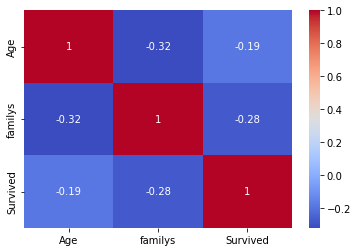

In [70]:
# To create a heatmap to visualize the correlation between 
# all pairs of variables in the new DataFrame new_df, 

# Calculate the correlation between all pairs of numeric variables
corr_matrix = new_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Display the plot
plt.show()

Analyzing survival rate of children using sex, size of family,
and embarkation port

In [71]:

# Group the data by sex, size of family, and embarkation port
grouped = new_df.groupby(['Sex', 'familys', 'Embarked'])

# Compute the survival rate for each group
survival_rates = grouped['Survived'].mean()

# Print the survival rates for each group
print(survival_rates)

Sex     familys  Embarked
female  0        C           0.750000
                 Q           1.000000
                 S           0.833333
        1        C           0.857143
                 S           0.875000
        2        C           0.750000
                 S           0.928571
        3        C           1.000000
                 S           0.857143
        4        S           0.000000
        5        S           0.000000
        6        S           0.333333
        7        S           0.500000
male    0        C           0.000000
                 S           0.058824
        1        C           1.000000
                 S           0.250000
        2        C           0.285714
                 S           0.571429
        3        S           1.000000
        4        C           0.000000
                 S           0.000000
        5        Q           0.000000
                 S           0.000000
        6        S           0.200000
        7        S      

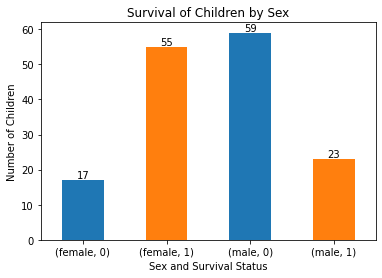

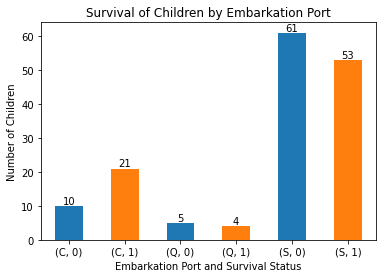

In [72]:

# Group the DataFrame by sex and survival status, and count the number of children in each group
sex_survival_counts = new_df.groupby(['Sex', 'Survived'])['Survived'].count()

# Group the DataFrame by embarkation port and survival status, and count the number of children in each group
embarked_survival_counts = new_df.groupby(['Embarked', 'Survived'])['Survived'].count()

# Define a list of colors to use for the male and female bars
colors = ['#1f77b4', '#ff7f0e']

# Plot the results as a bar chart
ax1 = sex_survival_counts.plot.bar(title='Survival of Children by Sex', rot=0, color=colors)
# Add labels to the bars
for i in ax1.containers:
    ax1.bar_label(i, label_type='edge')
plt.xlabel('Sex and Survival Status')
plt.ylabel('Number of Children')
plt.show()

ax2 = embarked_survival_counts.plot.bar(title='Survival of Children by Embarkation Port', rot=0, color=colors)
# Add labels to the bars
for i in ax2.containers:
    ax2.bar_label(i, label_type='edge')
plt.xlabel('Embarkation Port and Survival Status')
plt.ylabel('Number of Children')
plt.show()


A stacked bar chart to show the survival rate of children in different family sizes. This can help visualize how the survival rate changes with family size.

/var/folders/kr/xvpfh3v10ys92h53pc23l7j40000gn/T/ipykernel_24686/1250647747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['familys_cat'] = pd.cut(new_df['familys'], bins=[-1,0,2,4,20], labels=['Alone', 'Small', 'Medium', 'Large'])


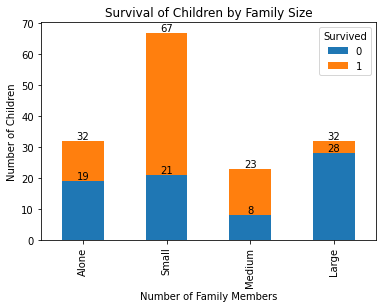

In [73]:

# Create a new column to categorize the number of family members
new_df['familys_cat'] = pd.cut(new_df['familys'], bins=[-1,0,2,4,20], labels=['Alone', 'Small', 'Medium', 'Large'])

# Group the DataFrame by survival status and number of family members
survival_by_familys = new_df.groupby(['familys_cat', 'Survived'])['Survived'].count()

# Reshape the data to create a stacked bar chart
survival_by_familys = survival_by_familys.unstack(level=1)

# Create a stacked bar chart
ax = survival_by_familys.plot(kind='bar', stacked=True)

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set the axis labels and title
plt.xlabel('Number of Family Members')
plt.ylabel('Number of Children')
plt.title('Survival of Children by Family Size')

# Show the plot
plt.show()

Additional resources:
Titanic victims • titanic facts. Titanic Facts. (2020, July 13). Retrieved April 13, 2023, from https://titanicfacts.net/titanic-victims/#:~:text=How%20many%20children%20died%20on,from%20First%20Class%20who%20perished. 